<a href='https://honglab.ai'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="50%" height="50%"/></p></a>

<center><em>Content Copyright by HongLab, Inc.</em></center>

# 미분

### 수치 미분(Numerical Differentiation)

In [1]:
def func(x):
    return x**2

x0 = 0.5
x1 = 3.5

y0 = func(x0)
y1 = func(x1)

print(y0 - y1)

-12.0


In [2]:
import numpy as np
import altair as alt

x_values = np.linspace(-2, 5, 100)
chart1 = alt.Chart(alt.Data(values=[{'x': x, 'y': func(x)} for x in x_values])).mark_line(color='blue', size=1).encode(x='x:Q', y='y:Q').properties(title='Function f(x) = x^2', width=400, height=300)
chart2 = alt.Chart(alt.Data(values=[{'x': x0, 'y': y0}, {'x': x1, 'y': y1}])).mark_line(color='red', size=3, opacity=0.5).encode(x='x:Q', y='y:Q')
final_chart = (chart1 + chart2).interactive().properties(title='f(x) = x^2')

final_chart.display()

alt.LayerChart(...)

$\frac{d}{dx}(e^x) = e^x$

In [3]:
import numpy as np

x_values = 3.5 

dx = 0.0001

print(np.exp(x_values))

print((np.exp(x_values + dx) - np.exp(x_values)) / dx)

33.11545195869231
33.11710778660881


### 해석적 미분(Analytical Differentiation)

어떤 함수를 미분(differentiation)해서 얻은 함수를 도함수(derivative)라고 합니다.

$y=f(x)=x^2$ 라면 $\frac{dy}{dx} = f'(x) = 2x$

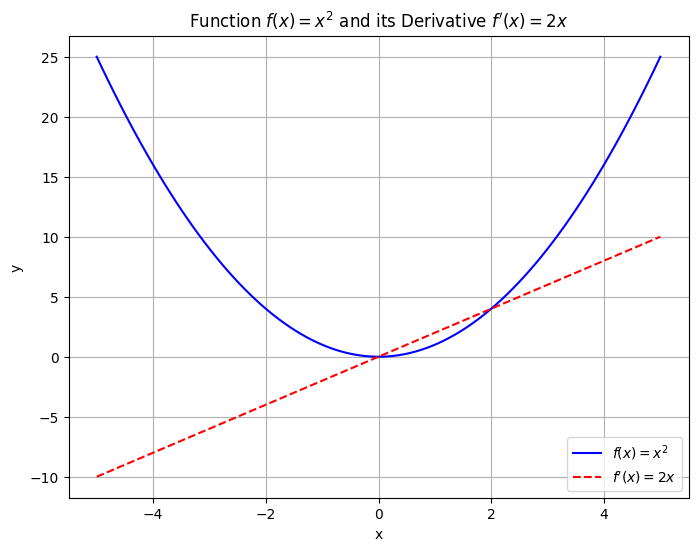

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(-5, 5, 100)

y_values = x_values ** 2

f_prime_x = 2.0 * x_values

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = x^2$', color='blue')
plt.plot(x_values, f_prime_x, label="$f'(x) = 2x$", color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function $f(x) = x^2$ and its Derivative $f\'(x) = 2x$')
plt.legend()
plt.grid(True)

plt.show()

### 체인룰(Chain Rule)

함수가 함수를 호출하는 복잡한 구조에서 미분을 단순화해주는 규칙입니다.

$$
y = (x^2 + 1)^{10}
$$

전개해보면

$$y = x^{20} + 10x^{18} + 45x^{16} + 120x^{14} + 210x^{12} + 252x^{10} + 210x^8 + 120x^6 + 45x^4 + 10x^2 + 1$$

더 복잡한 식에서는 전개하는 것만으로도 부담

구조를 단순화하기 위해서 $u = x^2 + 1$라는 매개 변수를 도입

$$u = x^2 + 1$$

$$
y = (x^2 + 1)^{10} = u^{10}
$$

체인룰을 적용하면 곱하기로 교체 

$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$

$$\frac{dy}{dx} = \frac{d}{du}(u^{10}) \cdot \frac{d}{dx}(x^2 + 1) = (10 u^{9}) \cdot (2x) = 10 (x^2 + 1)^9 \cdot (2x)$$


$$ \frac{dy}{dx} = 20x(x^2 + 1)^9 $$

In [5]:
def func_y(u):
    return u**10

def func_u(x):
    return x**2 + 1

def dy_du(u):
    return 10 * u**9

def du_dx(x):
    return 2 * x

x_value = 1.2 # 예시

u_value = func_u(x_value)
y_value = func_y(u_value)

dy_dx = dy_du(u_value) * du_dx(x_value)

print(y_value, dy_dx)

7479.942569398187 73573.2056006379


In [6]:
import sympy as sp

x = sp.symbols('x')

y = x**20 + 10*x**18 + 45*x**16 + 120*x**14 + 210*x**12 + 252*x**10 + 210*x**8 + 120*x**6 + 45*x**4 + 10*x**2 + 1

dy_dx = sp.diff(y, x)

print(y.subs(x, 1.2), dy_dx.subs(x, 1.2))

7479.94256939818 73573.2056006379
